In [1]:
import pandas as pd
import numpy as np

### Getting The Data

In [2]:
df = pd.read_csv('bank-full.csv',sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Select only the desired columns
selected_columns = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [5]:
df_selected = df[selected_columns]

In [6]:
df_selected.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# Check for missing values in the selected DataFrame
df_selected.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataset

### Question 1:

What is the most frequent observation (mode) for the column education?

In [8]:
df_selected['education'].mode()[0]

'secondary'

### Question 2:

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

In [9]:
df_selected.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
numerical_columns = list(df_selected.dtypes[df_selected.dtypes == 'int64'].index)
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
correlation_matrix  = df_selected[numerical_columns].corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


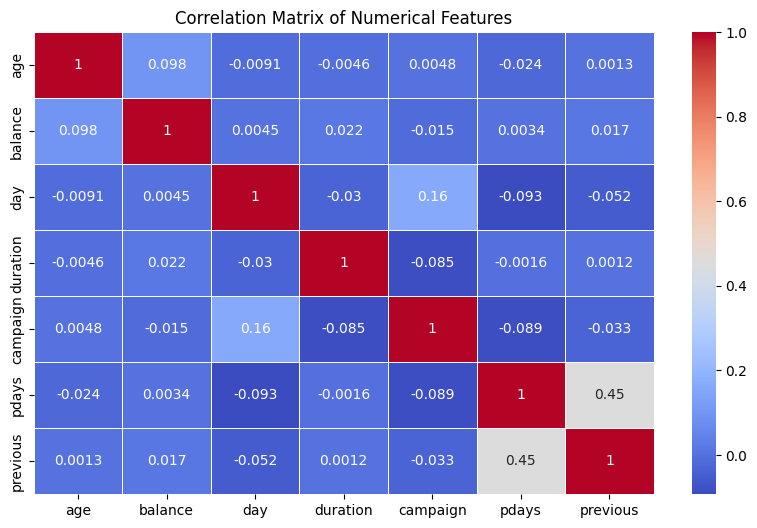

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


What are the two features that have the biggest correlation?

age and balance\
day and campaign\
day and pdays\
pdays and previous

We see that the biggest correlation is between pdays and previous

#### Target encoding

Now we want to encode the y variable.\
Let's replace the values yes/no with 1/0.

In [13]:
df_selected['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [14]:
df_selected = df_selected.copy()
df_selected['y'] = df_selected['y'].replace({'no': 0, 'yes': 1}).astype(int)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_20088\1940549436.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected['y'] = df_selected['y'].replace({'no': 0, 'yes': 1}).astype(int)


In [15]:
df_selected['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [16]:
df_selected['y'].dtype

dtype('int32')

#### Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution.\
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.\
Make sure that the target value y is not in your dataframe.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df_selected, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

del df_train['y']
del df_val['y']
del df_test['y']

### Question 3

Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.\
Round the scores to 2 decimals using round(score, 2).

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [24]:
def mutual_info_churn_score(series,target):
    return mutual_info_score(series, target)

In [25]:
mi_scores = df_train[categorical_columns].apply(mutual_info_churn_score, target=y_train)

In [26]:
mi_scores_rounded = mi_scores.sort_values(ascending=False).round(2)
mi_scores_rounded

poutcome     0.03
month        0.03
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

We see that poutcome has the highest mutual information score with y

#### Question 4

Now let's train a logistic regression.\
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.\
Fit the model on the training dataset.\
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:\
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)\
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [29]:
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [32]:
# Make predictions on the validation set
y_pred_val = model.predict(X_val)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(f"Validation Accuracy: {round(accuracy_score(y_val, y_pred_val),2)}")

Validation Accuracy: 0.9


### Question 5

Let's find the least useful feature using the feature elimination technique.\
Train a model with all these features (using the same parameters as in Q4).\
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.\
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.\

In [35]:
features_to_exclude = ['age', 'balance', 'marital', 'previous']

In [36]:
baseline_accuracy = accuracy_score(y_val, model.predict(X_val))

In [37]:
accuracy_differences = {}

for feature in features_to_exclude:
    # Create a new feature set excluding the current feature
    new_feature_columns = [col for col in df_train.columns if col != feature]
    
    # Transform the training and validation data without the excluded feature
    train_dict = df_train[new_feature_columns].to_dict(orient='records')
    X_train_new = dv.fit_transform(train_dict)

    val_dict = df_val[new_feature_columns].to_dict(orient='records')
    X_val_new = dv.transform(val_dict)
    
    # Train the model without the excluded feature
    model.fit(X_train_new, y_train)
    
    # Calculate accuracy on the validation set
    accuracy_without_feature = accuracy_score(y_val, model.predict(X_val_new))
    
    # Record the difference in accuracy
    accuracy_difference = baseline_accuracy - accuracy_without_feature
    accuracy_differences[feature] = accuracy_difference

In [38]:
for feature, difference in accuracy_differences.items():
    print(f"{feature}: {difference}")

age: 0.00033178500331787486
balance: 0.00022119000221187957
marital: 0.0014377350143773837
previous: 0.00033178500331787486


In [39]:
min(accuracy_differences, key=accuracy_differences.get)

'balance'

### Question 6

Now let's train a regularized logistic regression.\
Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10].\
Train models using all the features as in Q4.\
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [40]:
C_values = [0.0001, 0.01, 0.1, 1, 10] 

We Cant set the parameter C to 0 because it will give an error

In [41]:
accuracies = {}
for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)  # Train the model
    y_pred_val = model.predict(X_val)  # Predict on validation set
    accuracy = accuracy_score(y_val, y_pred_val)  # Calculate accuracy
    accuracies[C] = round(accuracy, 3)  # Store rounded accuracy

In [42]:
for C, accuracy in accuracies.items():
    print(f"C={C}: {accuracy}")

C=0.0001: 0.889
C=0.01: 0.898
C=0.1: 0.901
C=1: 0.902
C=10: 0.901
